In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')

import seaborn as sb
import numpy as np
import pandas as pd
import dask.dataframe as dd

from itertools import chain
from collections import Counter

In [2]:
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/Facebook_Economy.csv"

In [24]:
fb_economy = pd.read_csv(file,index_col='IDLink')

In [25]:
fb_economy.tail()

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
IDLink,,,,,,,,,,,,,,,,,,,,,
58440,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
58441,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
58444,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
58446,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,2,2,2,2,2,2,2,2,2
58447,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [26]:
top_10 = fb_economy.TS144.nlargest(10).index

**Investigating the lifespan of the ten most popular stories by TS144**

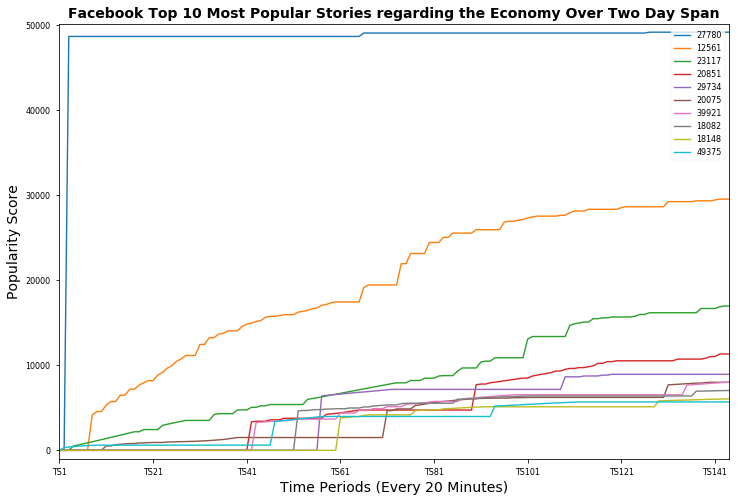

In [38]:
fb_economy.loc[top_10].T.plot(figsize=(12,8))
plt.legend(loc='upper right')
plt.title('Facebook Top 10 Most Popular Stories regarding the Economy Over Two Day Span',fontsize=14,fontweight='bold')
plt.xlabel('Time Periods (Every 20 Minutes)',fontsize=14)
plt.ylabel('Popularity Score',fontsize=14)
plt.margins(0.02)
plt.show()

**Using the chain method to collect the periodic top ten stories and unpack the list of lists into a single list of dicts**

In [30]:
top_10_periodically = list(chain.from_iterable([list(fb_economy[k].nlargest(10).index) for k in list(fb_economy.columns)]))

In [31]:
top_10_periodically[:10]

[47982, 46935, 45397, 2229, 7389, 43233, 43985, 48003, 51600, 2279]

**Converting dicts into tuples to make it easier for DataFrame construction using .from_records(data) method**

In [33]:
count_top_10_appearances = [(k, v) for k, v in dict(Counter(top_10_periodically)).items()]

In [35]:
count_top_10_appearances[:10]

[(47982, 25),
 (46935, 12),
 (45397, 5),
 (2229, 2),
 (7389, 2),
 (43233, 1),
 (43985, 1),
 (48003, 1),
 (51600, 1),
 (2279, 1)]

In [36]:
trending_df = pd.DataFrame.from_records(count_top_10_appearances,columns=['ID','Count']).set_index('ID')

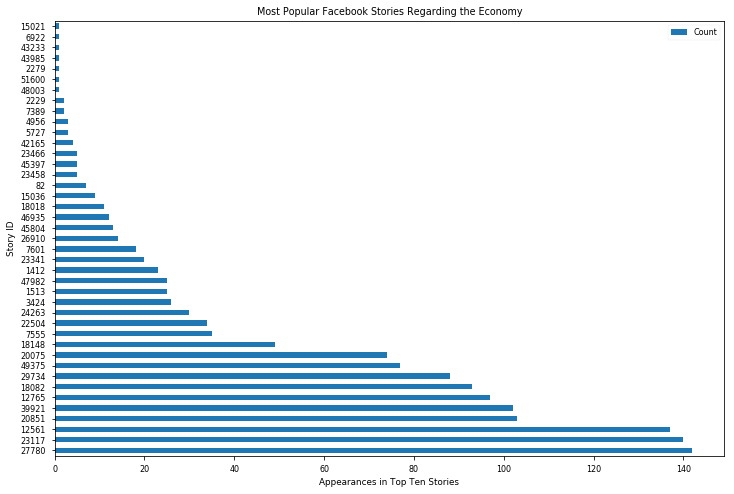

In [40]:
fig = trending_df.sort_values(by='Count',ascending=False).plot(kind='barh',figsize=(12,8))
plt.title('Most Popular Facebook Stories Regarding the Economy')
plt.ylabel('Story ID')
plt.xlabel('Appearances in Top Ten Stories')
plt.show()